In [1]:
from tensorflow import keras
import numpy as np
import cv2
import pandas as pd

In [3]:
model1 = keras.models.load_model('../models/pre_model_1_1_10_epochs.h5')
model2 = keras.models.load_model('../models/pre_model_2_8.keras')
model5 = keras.models.load_model('../models/pre_model_5_1_10_epochs.h5')
model6 = keras.models.load_model('../models/pre_model_6_1_20_2_epochs.h5')
model7 = keras.models.load_model('../models/pre_model_7_1_10_epochs.h5')


In [4]:

balanced_labels = pd.read_csv('./chosen_labels_not_all_rules.csv', sep=';',index_col=False)
balanced_labels.describe()

,Rule1,Rule2,Rule5,Rule6,Rule7
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.234694,0.225624,0.252834,0.379819,0.124717
std,0.424048,0.418229,0.434883,0.485617,0.330585
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
all_models = [model1, model2, model5, model6, model7]
rules = [
            "Kein Scooter",
            "Scooter unvollständig/zu wenig Umgebung",
            "Scooter auf Grünfläche",
            "Scooter blockiert Fahrradständer",
            "Scooter steht an ÖPNV Haltestelle / Parkverbot",
        ]

In [6]:

def load_image2(img_path, target_size = (512, 512)):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure image is in correct format
        img = img / 255.0  # Normalize image to the range [0, 1]
    return img

In [8]:
predictions_df = pd.DataFrame(columns=["Image_name","Rule1","Rule2","Rule5","Rule6","Rule7"])
folder_path = "../Yoio_Park_Proof/"

i=0
while i < len(balanced_labels):
    
    img_name=balanced_labels['Image_name'][i]
    img = load_image2(folder_path+img_name)
    img_array = np.expand_dims(img, axis=0)
    predictions_array =[img_name]

    for model in all_models:
      predictions = model.predict(img_array)

      if predictions[0][1]>0.5:
        int_pred=1
      else:
        int_pred=0   
      predictions_array.append(int_pred)
      
    predictions_df.loc[len(predictions_df)] = predictions_array
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━

In [9]:
print(predictions_df.describe())
print("\n")
print(balanced_labels.describe())

            Rule1       Rule2       Rule5       Rule6       Rule7
count  882.000000  882.000000  882.000000  882.000000  882.000000
mean     0.232426    0.264172    0.328798    0.439909    0.214286
std      0.422619    0.441142    0.470043    0.496658    0.410559
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000    0.000000    0.000000
75%      0.000000    1.000000    1.000000    1.000000    0.000000
max      1.000000    1.000000    1.000000    1.000000    1.000000


            Rule1       Rule2       Rule5       Rule6       Rule7
count  882.000000  882.000000  882.000000  882.000000  882.000000
mean     0.234694    0.225624    0.252834    0.379819    0.124717
std      0.424048    0.418229    0.434883    0.485617    0.330585
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000
50%     

In [10]:
predictions_df.to_csv('./predicted_labels_not_all_rules_2.csv', sep=';', index=False)

In [2]:
#If you don´t want to create new predictions
import pandas as pd
predictions_df = pd.read_csv('./predicted_labels_not_all_rules.csv', sep=';',index_col=False)

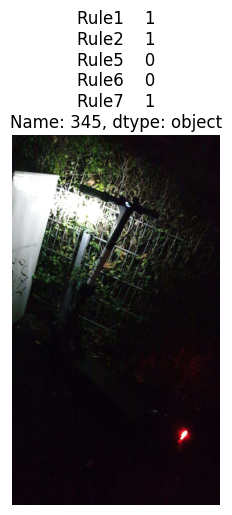

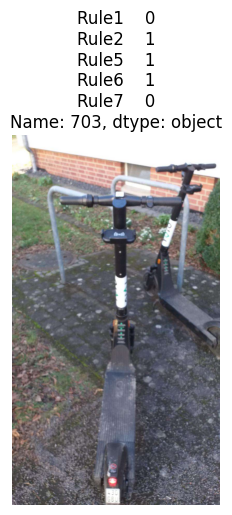

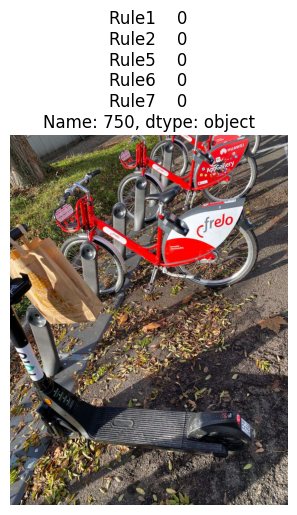

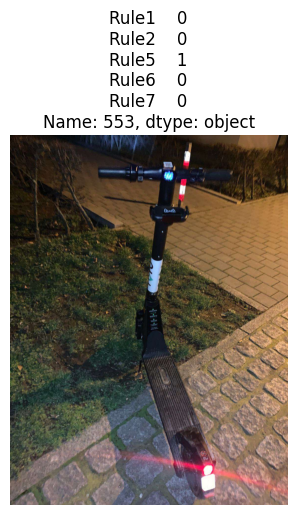

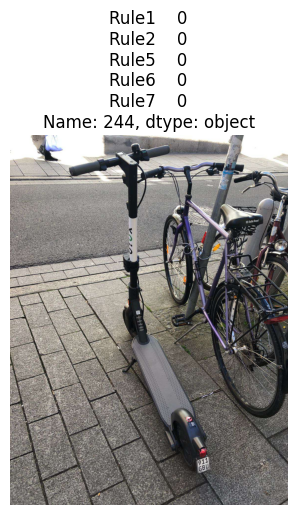

In [3]:
#show some random predictions with images
import cv2
import random
import matplotlib.pyplot as plt
folder_path = '../Yoio_Park_Proof/'

for i in range(5):   
    random_index = random.randint(0, len(predictions_df))
    img_name = predictions_df['Image_name'][random_index]
    img = cv2.imread(folder_path+img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(predictions_df.iloc[random_index][1:])
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print('\n')